In [447]:
!pip install nltk
!pip install wordcloud

In [1]:
import nltk
import pandas as pd,numpy as np
import matplotlib.pyplot as plt

In [2]:
reviews = pd.read_csv("D:\IBM_Project_Data.csv")

In [3]:
reviews.head()

,Reviews,Rating,Sentiment
0,Nice product...👍👍..,5,1
1,It says 8 hrs but since I use this to watch le...,4,1
2,the base is really good. it a value for this r...,4,1
3,This product was had manufacturing defect insi...,1,0
4,Edit: After 1 year of usage.The headphone star...,2,0


In [4]:
reviews.Sentiment.value_counts()

1    2484
0    1376
Name: Sentiment, dtype: int64

In [5]:
reviews.shape

(3860, 3)

In [6]:
#dropping the empty reviews
reviews = reviews.dropna(how='any',axis=0)

In [7]:
ReviewsMerged = " ".join(reviews.Reviews.values)

In [8]:
ReviewsMerged

'Nice product...👍👍.. It says 8 hrs but since I use this to watch lectures it gives more than 15hrs+ battery life.Sound quality is good, Highs & Lows are perfectly managed but to term these as Bass Heavy would be widely mistake.Overall 4 stars the base is really good. it a value for this range of money.i really liked it.only the comfort has to be more good. This product was had manufacturing defect inside the plastic band material,from which it is now broken out, that could not be visible during product receiving time period. Please do something for this automatic damaging, I wanted number of time to connect with customer care service but no any my call receiving by customer service. Please do the satisfactory advice to repair or exchange purpose because this product is under guarantee period. I was received this order on 14 May 2020. Edit: After 1 year of usage.The headphone starts developing cracks in the overhead plastic band, the padding on the earcups and head band started coming o

In [9]:
from wordcloud import WordCloud

In [10]:
word_cloud = WordCloud().generate_from_text(ReviewsMerged)

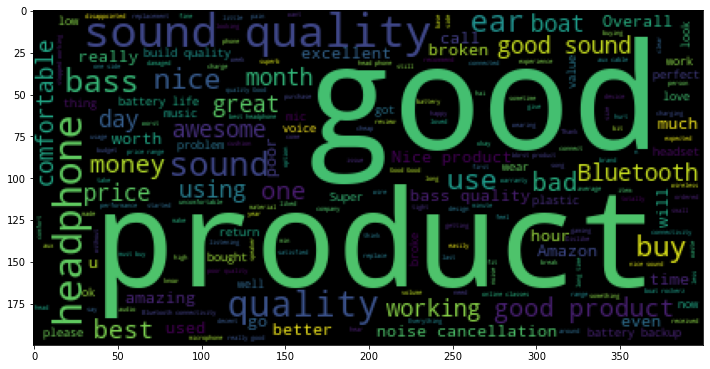

In [11]:
plt.figure(figsize=[12,12])
plt.imshow(word_cloud)
plt.show()

#1. case normalization and tokenizing

In [12]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
#All Reviews tokenized and in lower case
all_terms = word_tokenize(ReviewsMerged.lower())

In [14]:
all_terms

['nice',
 'product',
 '...',
 '👍👍',
 '..',
 'it',
 'says',
 '8',
 'hrs',
 'but',
 'since',
 'i',
 'use',
 'this',
 'to',
 'watch',
 'lectures',
 'it',
 'gives',
 'more',
 'than',
 '15hrs+',
 'battery',
 'life.sound',
 'quality',
 'is',
 'good',
 ',',
 'highs',
 '&',
 'lows',
 'are',
 'perfectly',
 'managed',
 'but',
 'to',
 'term',
 'these',
 'as',
 'bass',
 'heavy',
 'would',
 'be',
 'widely',
 'mistake.overall',
 '4',
 'stars',
 'the',
 'base',
 'is',
 'really',
 'good',
 '.',
 'it',
 'a',
 'value',
 'for',
 'this',
 'range',
 'of',
 'money.i',
 'really',
 'liked',
 'it.only',
 'the',
 'comfort',
 'has',
 'to',
 'be',
 'more',
 'good',
 '.',
 'this',
 'product',
 'was',
 'had',
 'manufacturing',
 'defect',
 'inside',
 'the',
 'plastic',
 'band',
 'material',
 ',',
 'from',
 'which',
 'it',
 'is',
 'now',
 'broken',
 'out',
 ',',
 'that',
 'could',
 'not',
 'be',
 'visible',
 'during',
 'product',
 'receiving',
 'time',
 'period',
 '.',
 'please',
 'do',
 'something',
 'for',
 'this',

In [15]:
from string import punctuation
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
stop_nltk = stopwords.words("english")


In [17]:
stop_nltk

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
stop_updated = stop_nltk + list(punctuation) + ["headphone","go","product","..","...","....","'s"]

In [19]:
ReviewsUpdated = [word for word in all_terms if word not in stop_updated and len(word) >= 2]


In [20]:
ReviewUpdString = " ".join(ReviewsUpdated)

In [21]:
ReviewUpdString

"nice 👍👍 says hrs since use watch lectures gives 15hrs+ battery life.sound quality good highs lows perfectly managed term bass heavy would widely mistake.overall stars base really good value range money.i really liked it.only comfort good manufacturing defect inside plastic band material broken could visible receiving time period please something automatic damaging wanted number time connect customer care service call receiving customer service please satisfactory advice repair exchange purpose guarantee period received order 14 may 2020. edit year usage.the starts developing cracks overhead plastic band padding earcups head band started coming boat logo completely vanished happened even taking utmost care sound still fine.please aware cheap plastic poor built quality instead buy blaupunkt bh01 eqz headphones best price.ps gold plating aux cable come creating much disturbance connecting listening music rendering useless.edit sound cut-offs annoying watching films playing ca n't hear di

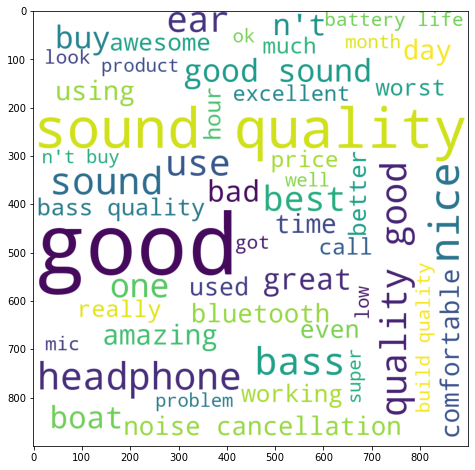

In [22]:
word_cloud = WordCloud(width=900,height=900,background_color='white',max_words = 50,random_state = 80).\
generate_from_text(ReviewUpdString)
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

In [23]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
lemmatizedReviews = [ lemmatizer.lemmatize(word,pos='v') for word in ReviewsUpdated]

In [25]:
lemmatizedReviewsStr=" ".join(lemmatizedReviews)

In [26]:
lemmatizedReviewsStr

"nice 👍👍 say hrs since use watch lecture give 15hrs+ battery life.sound quality good highs low perfectly manage term bass heavy would widely mistake.overall star base really good value range money.i really like it.only comfort good manufacture defect inside plastic band material break could visible receive time period please something automatic damage want number time connect customer care service call receive customer service please satisfactory advice repair exchange purpose guarantee period receive order 14 may 2020. edit year usage.the start develop crack overhead plastic band pad earcups head band start come boat logo completely vanish happen even take utmost care sound still fine.please aware cheap plastic poor build quality instead buy blaupunkt bh01 eqz headphones best price.ps gold plat aux cable come create much disturbance connect listen music render useless.edit sound cut-offs annoy watch film play ca n't hear dialogues low volume.honest review 46 days usage pros good sound

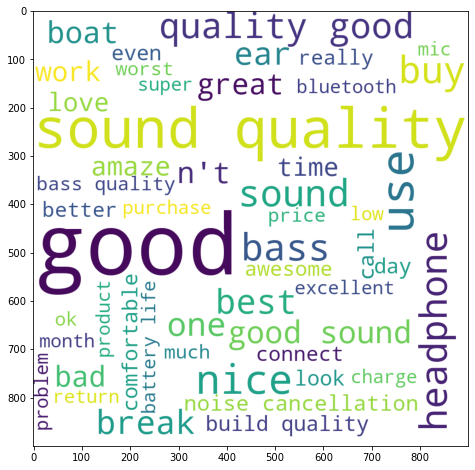

In [27]:
word_cloud = WordCloud(width=900,height=900,background_color='white',max_words = 50,random_state = 80).\
generate_from_text(lemmatizedReviewsStr)
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

In [28]:
def clean_txtlemma(sent):
    tokens = word_tokenize(sent.lower())
    lemmatized = [lemmatizer.lemmatize(term, pos = 'v') for term in tokens if term not in stop_updated and len(term) > 1] 
    res = " ".join(lemmatized)
    return res

In [29]:
reviews['lemmatizedReviews'] = reviews.Reviews.apply(clean_txtlemma)

In [30]:
reviews

,Reviews,Rating,Sentiment,lemmatizedReviews
0,Nice product...👍👍..,5,1,nice 👍👍
1,It says 8 hrs but since I use this to watch le...,4,1,say hrs since use watch lecture give 15hrs+ ba...
2,the base is really good. it a value for this r...,4,1,base really good value range money.i really li...
3,This product was had manufacturing defect insi...,1,0,manufacture defect inside plastic band materia...
4,Edit: After 1 year of usage.The headphone star...,2,0,edit year usage.the start develop crack overhe...
...,...,...,...,...
3855,Sound connection breaks again & again. Not qui...,2,0,sound connection break quite good
3856,Initial 2 day when I purchased quality was goo...,2,0,initial day purchase quality good time pass so...
3857,It packed or tightly cover my all ear. Started...,2,0,pack tightly cover ear start sweat 10 minutes ...
3858,No questions just buy it,5,1,question buy


**Bar Graph on top 50 words**

In [31]:
all_terms = []
fdist = {}
all_terms = lemmatizedReviewsStr.split(" ")
for word in all_terms:
    fdist[word] = fdist.get(word,0) + 1

In [32]:
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)

<AxesSubplot:xlabel='words'>

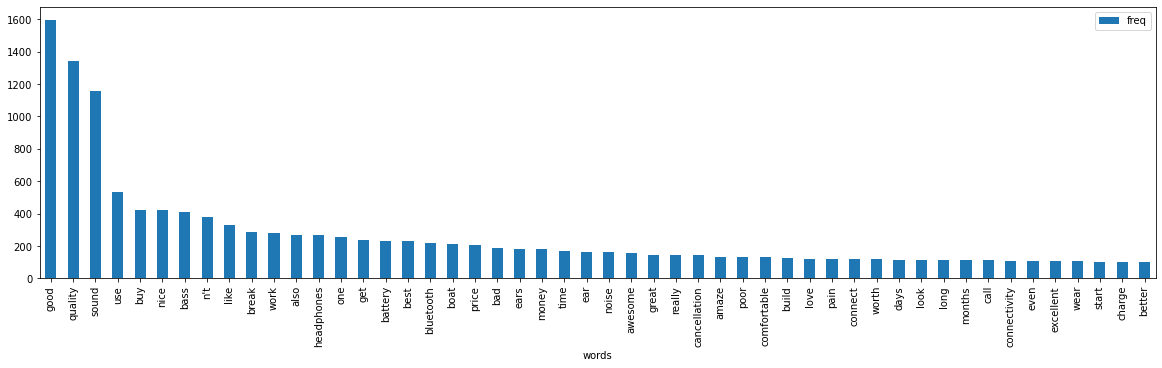

In [33]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(50).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

**Bar graph plotting for top 50 frequenctly used bigrams and Unigrams**

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
bigram_count_vectorizer = CountVectorizer(ngram_range=(1,2),max_features = 1500)

In [36]:
X_bigram = bigram_count_vectorizer.fit_transform(reviews['lemmatizedReviews'])

# Creating a DTM
DTM_bigram = pd.DataFrame(X_bigram.toarray(), columns=bigram_count_vectorizer.get_feature_names())

In [37]:
bigram_count_vectorizer.get_feature_names()

['10',
 '10 15',
 '10 days',
 '100',
 '1000',
 '1099',
 '12',
 '1200',
 '14',
 '15',
 '15 days',
 '15 min',
 '15 minutes',
 '1500',
 '1k',
 '1st',
 '20',
 '20 days',
 '200',
 '2020',
 '2021',
 '2022',
 '30',
 '30 mins',
 '370',
 '370 wireless',
 '400',
 '450',
 '50',
 '500',
 '510',
 '80',
 '899',
 '900',
 '999',
 'able',
 'able hear',
 'absolutely',
 'acceptable',
 'accord',
 'ache',
 'actually',
 'adjust',
 'adjustable',
 'ads',
 'advice',
 'affordable',
 'affordable price',
 'after',
 'ago',
 'ahead',
 'air',
 'all',
 'almost',
 'along',
 'already',
 'also',
 'also amaze',
 'also fine',
 'also get',
 'also good',
 'also great',
 'also nice',
 'although',
 'always',
 'amaze',
 'amaze bass',
 'amaze battery',
 'amaze sound',
 'amazon',
 'amount',
 'and',
 'android',
 'android phone',
 'annoy',
 'another',
 'anyone',
 'anything',
 'apart',
 'apply',
 'area',
 'around',
 'around ears',
 'arrive',
 'ask',
 'aspects',
 'assure',
 'atleast',
 'attach',
 'attend',
 'attractive',
 'audible',

In [38]:
DTM_bigram

,10,10 15,10 days,100,1000,1099,12,1200,14,15,...,year warranty,years,yeh,yes,you,youtube,zero,zoom,गय,नह
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3745,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

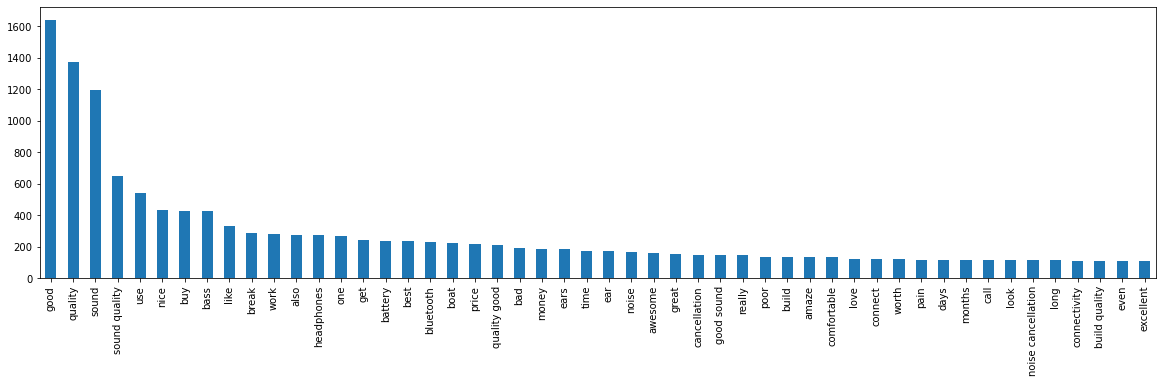

In [39]:
DTM_bigram.sum().sort_values(ascending=False).head(50).plot.bar(figsize=(20,5)) 

In [40]:
DTM_bigram.sum()

10         56
10 15       5
10 days    13
100        14
1000       24
           ..
youtube     5
zero        9
zoom        6
गय          5
नह          8
Length: 1500, dtype: int64

 **Sentiment prediction using vader Strategy**

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [42]:
def get_vader_sentiment(sent):
    return analyser.polarity_scores(sent)['compound']

In [43]:
reviews['score_vader'] = reviews.Reviews.apply(get_vader_sentiment)

In [44]:
reviews['sent_prediction_vader'] = reviews.score_vader.\
apply(lambda x:1 if x>0 else 0)

In [45]:
reviews

,Reviews,Rating,Sentiment,lemmatizedReviews,score_vader,sent_prediction_vader
0,Nice product...👍👍..,5,1,nice 👍👍,0.4215,1
1,It says 8 hrs but since I use this to watch le...,4,1,say hrs since use watch lecture give 15hrs+ ba...,0.8573,1
2,the base is really good. it a value for this r...,4,1,base really good value range money.i really li...,0.9279,1
3,This product was had manufacturing defect insi...,1,0,manufacture defect inside plastic band materia...,0.5994,1
4,Edit: After 1 year of usage.The headphone star...,2,0,edit year usage.the start develop crack overhe...,0.9756,1
...,...,...,...,...,...,...
3855,Sound connection breaks again & again. Not qui...,2,0,sound connection break quite good,-0.3865,0
3856,Initial 2 day when I purchased quality was goo...,2,0,initial day purchase quality good time pass so...,0.6382,1
3857,It packed or tightly cover my all ear. Started...,2,0,pack tightly cover ear start sweat 10 minutes ...,0.6369,1
3858,No questions just buy it,5,1,question buy,-0.2960,0


In [46]:
accuracy_score(reviews.Sentiment,reviews.sent_prediction_vader)

0.7985592315901814

In [47]:
confusion_matrix(reviews.Sentiment,reviews.sent_prediction_vader)

array([[1024,  336],
       [ 419, 1969]], dtype=int64)

**Sentiment Prediction Strategy-1 :Using DTM/TDM**

In [48]:
reviews.head()

,Reviews,Rating,Sentiment,lemmatizedReviews,score_vader,sent_prediction_vader
0,Nice product...👍👍..,5,1,nice 👍👍,0.4215,1
1,It says 8 hrs but since I use this to watch le...,4,1,say hrs since use watch lecture give 15hrs+ ba...,0.8573,1
2,the base is really good. it a value for this r...,4,1,base really good value range money.i really li...,0.9279,1
3,This product was had manufacturing defect insi...,1,0,manufacture defect inside plastic band materia...,0.5994,1
4,Edit: After 1 year of usage.The headphone star...,2,0,edit year usage.the start develop crack overhe...,0.9756,1


In [49]:
X = reviews.lemmatizedReviews.values
y = reviews.Sentiment.values

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,
                                                 random_state=16042022)

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
vectorizer = CountVectorizer(max_features=1500)

In [53]:
X_train_bow = vectorizer.fit_transform(X_train)


In [54]:
X_test_bow = vectorizer.transform(X_test)


In [55]:
X_train_bow.shape, X_test_bow.shape

((2811, 1500), (937, 1500))

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
logreg = LogisticRegression()

In [58]:
logreg.fit(X_train_bow,y_train)

LogisticRegression()

In [59]:
y_test_pred = logreg.predict(X_test_bow)

In [60]:
accuracy_score(y_test, y_test_pred)

0.8228388473852721

**Sentiment Prediction Strategy-2 : Using TF-IDF Vectorizer**

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
vectorizer = TfidfVectorizer(max_features=2000)

In [63]:

X_train_bow = vectorizer.fit_transform(X_train)

In [64]:

X_test_bow = vectorizer.transform(X_test)

In [65]:
X_train_bow.shape, X_test_bow.shape

((2811, 2000), (937, 2000))

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
logreg = LogisticRegression()

In [68]:
logreg.fit(X_train_bow,y_train)

LogisticRegression()

In [69]:
y_test_pred = logreg.predict(X_test_bow)

In [70]:
accuracy_score(y_test, y_test_pred)

0.8356456776947705

**Finding Most Similar Words Using Cosine Similarity**

In [71]:
from sklearn.metrics.pairwise import cosine_similarity

In [72]:
tfidfvectorizer = TfidfVectorizer(max_features=1500)

In [73]:
X = tfidfvectorizer.fit_transform(reviews['lemmatizedReviews'])
df_tfidf = pd.DataFrame(X.toarray(),columns=tfidfvectorizer.get_feature_names())

In [74]:
def get_similar_words(input_word, sim_mat):
    cos_vals = sim_mat[input_word].sort_values(ascending=False)
    similar_words = cos_vals.drop(input_word).head(3)
    return similar_words

In [75]:
simatch = cosine_similarity(df_tfidf.T)

simatch = pd.DataFrame(simatch, columns= df_tfidf.columns, index= df_tfidf.columns)

get_similar_words('cushion', simatch)

hot     0.209395
soft    0.204037
sore    0.195406
Name: cushion, dtype: float64

In [76]:
get_similar_words('sound', simatch)

quality    0.592717
bass       0.253010
good       0.250465
Name: sound, dtype: float64

In [77]:
get_similar_words('charge', simatch)

cable    0.175368
port     0.166721
usb      0.149080
Name: charge, dtype: float64

In [78]:
get_similar_words('battery', simatch)

life      0.569579
backup    0.546835
long      0.182017
Name: battery, dtype: float64

In [79]:
get_similar_words('ear', simatch)

pain    0.426708
cup     0.282301
pad     0.218661
Name: ear, dtype: float64

# K-Means and GMM

In [80]:
X = reviews.lemmatizedReviews.values
y = reviews.Sentiment.values

In [81]:
Xall = vectorizer.fit_transform(X)

In [82]:
Xall = Xall.toarray()

In [83]:
Xall_df = pd.DataFrame(Xall, columns=vectorizer.get_feature_names())

In [84]:
Xall_df

,02,10,100,1000,1099,10bass,10m,1100,1199,12,...,लग,सबस,सह,हम,हर,ᴀɴᴅ,ᴍᴀᴅᴇ,ᴍᴜꜱɪᴄ,ᴘʟᴇᴀꜱᴇ,ᴛʀʏ
0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.063357,0.0,0.070761,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3744,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3745,0.0,0.229591,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3746,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, max_iter=100000,random_state = 1804)
kmeans.fit(Xall)
labels = kmeans.predict(Xall)

In [86]:
labels.sum()

3404

In [87]:
accuracy_score(labels, reviews.Sentiment)

0.567769477054429

In [88]:
#GMM:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, max_iter = 100000, tol = 0.000001,random_state = 180422)
gmm.fit(Xall)
labels = gmm.predict(Xall)

In [89]:
labels.sum()

634

In [90]:
labels

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [91]:
reviews.Sentiment

0       1
1       1
2       1
3       0
4       0
       ..
3855    0
3856    0
3857    0
3858    1
3859    1
Name: Sentiment, Length: 3748, dtype: int64

In [92]:
accuracy_score(labels, reviews.Sentiment)

0.4978655282817503